The naive bayes algorithm uses the likelihood function to classify the data. Also referred to as Multinomial naive bayes.

It includes the concept of;
1. log scale
2. Normal Distribution
3. Difference between Likelihood and Probability



### The Log Scale

The log scale isolates the exponent. Consider a normal scale i.e. 0,1,2,3,4,5,6,7,8

The same scale can be converted to the power of 2 i.e.

1 => 2^0
2 => 2^1
4 => 2^2
8 => 2^3
 
The log isolates the exponent, so if you take 
log_base_2 (1) = log_base_2 (2^0) = 0
log_base_2 (2) = log_base_2 (2^1) = 1
log_base_2 (4) = log_base_2 (2^2) = 2
log_base_2 (8) = log_base_2 (2^3) = 3
...

similarly you can convert other numbers also using the correct exponential value of 2

#### log_base_2 (0) is not defined
The reason is there is no number that you can raise 2 with so that it equals to 0. 

The log_base_2 (0) = -infinity or log_base_2 (2^-infiity) = 0

The log scale is useful in showing the folds data because 1 raise to 8 points is equal scale of 1 raise to -8 points (1/8).

Consider the example of qPCR or Real-Time PCR data. The number of products double everytime the cycle is completed.


1st cycle:

let's say 1 product created for the 1st cycle. so on normal scale it's 1

log_base_2 (1) = log_base_2 (2^0) = 0, 0=> becomes our baseline.

2nd cycle:

the number of products double, so normal scale = 2 (1x2) (2 times the first transcript)

log_base_2 (2) = log_base_2 (2^1) = 1, 1 => log scale on second iteration

3rd cycle:

the number of products double from the previous time, so normal scale = 8 (1x2x2x2) (3 times the first transacipt)

log_base_2 (8) = log_base_2 (2^3) = 3, 3 => log scale on 3rd iteration



### A Sample of Ct data with log

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('ct log data.csv')

In [3]:
df

,DNA copies,log DNA copies,Ct
0,10,1,35.20
1,100,2,32.60
2,1000,3,29.10
3,10000,4,25.80
4,100000,5,22.50
5,1000000,6,19.22
6,10000000,7,16.00


In [4]:
x = df['log DNA copies']
y = df['Ct']
x = x.values
y = y.values
model = LinearRegression()
model.fit(x.reshape(-1,1), y)
predictions = model.predict(x.reshape(-1,1))

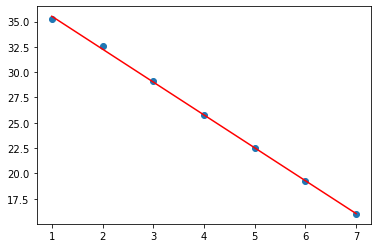

In [13]:
plt.scatter(x,y)
plt.plot(x, predictions, color='red')

In [16]:
x = df['DNA copies ']
y = df['Ct']
x = x.values
y = y.values
model = LinearRegression()
model.fit(x.reshape(-1,1), y)
predictions = model.predict(x.reshape(-1,1))

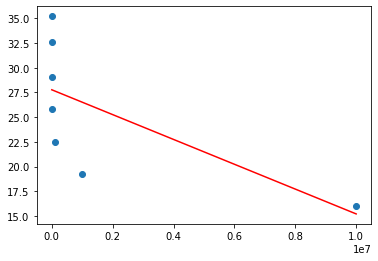

In [17]:
plt.scatter(x,y)
plt.plot(x, predictions, color='red')

Thats how the log function helps to find the appropriate line because linear regression doesn't work good with outliers...

In [27]:
model.predict([[10], [100], [1000], [10000], [100000], [1000000], [10000000], [10000000]])

array([27.76608076, 27.76596782, 27.76483847, 27.75354492, 27.64060942,
       26.5112544 , 15.21770421, 15.21770421])

### Normal Distributions

Normal distribution shows a bell shape curve. Normal Distribution is always centered around the average value.

The height of the curve is defined by the number of possibilities and the width of the curve is defined by the standard deviation.

95% of the data falls between +- 2 std around the mean.

To draw a normal distribution, we need 2 things;
1. The average of the data that defines the center of the curve
2. the std derviation which tells u how wide the curve should be. And the width of the curve defines how tall the curve should be. The taller the curve the less wider / narrower it is. The shorter the curve the more wider it is.

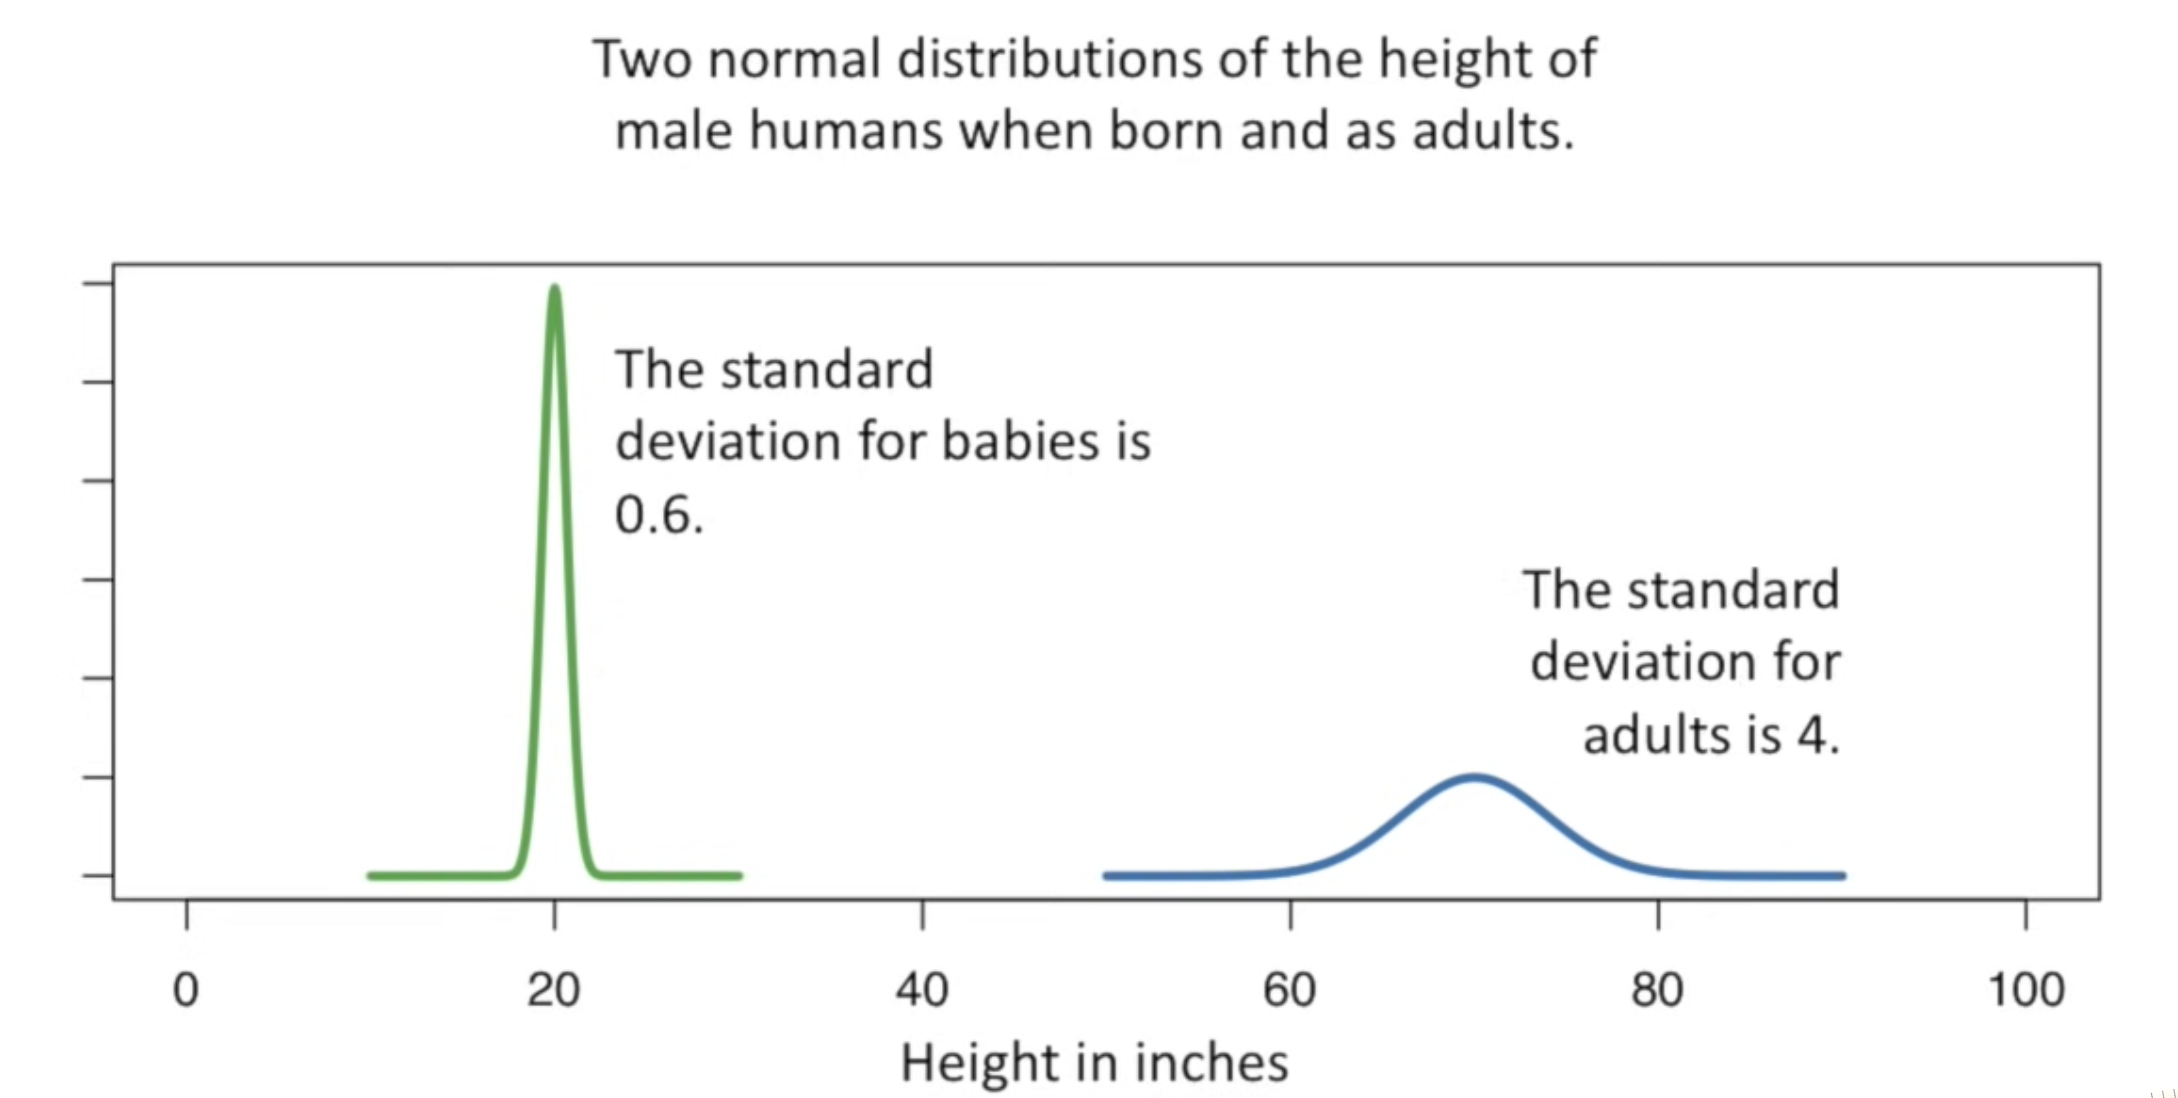

#### Even if you are not normal, the average is normal !! 


#### The Uniform Distribution:

Below is a uniform distribution, because there is ann equal probability of selecting values between 0 and 1.

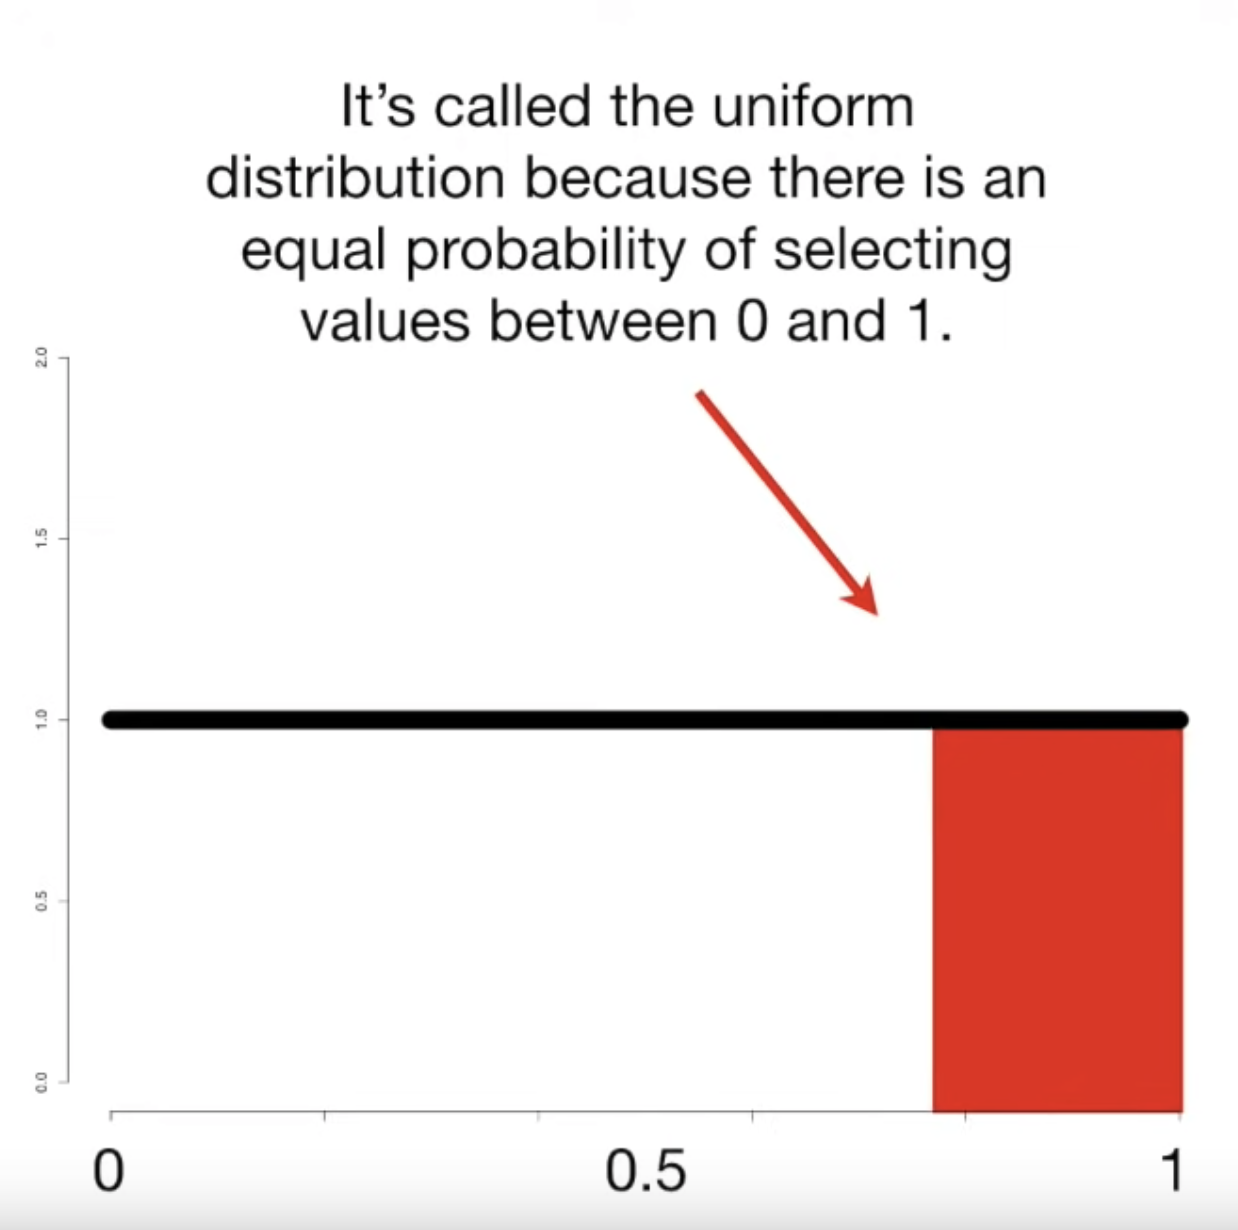

### The Central Limit Theorem

It does't matter which distribution (normal, uniform, right-skewed, left-skewed, etc.), the distribution of the mean of randomly selected measurements (from these distributions) is normally distributed.

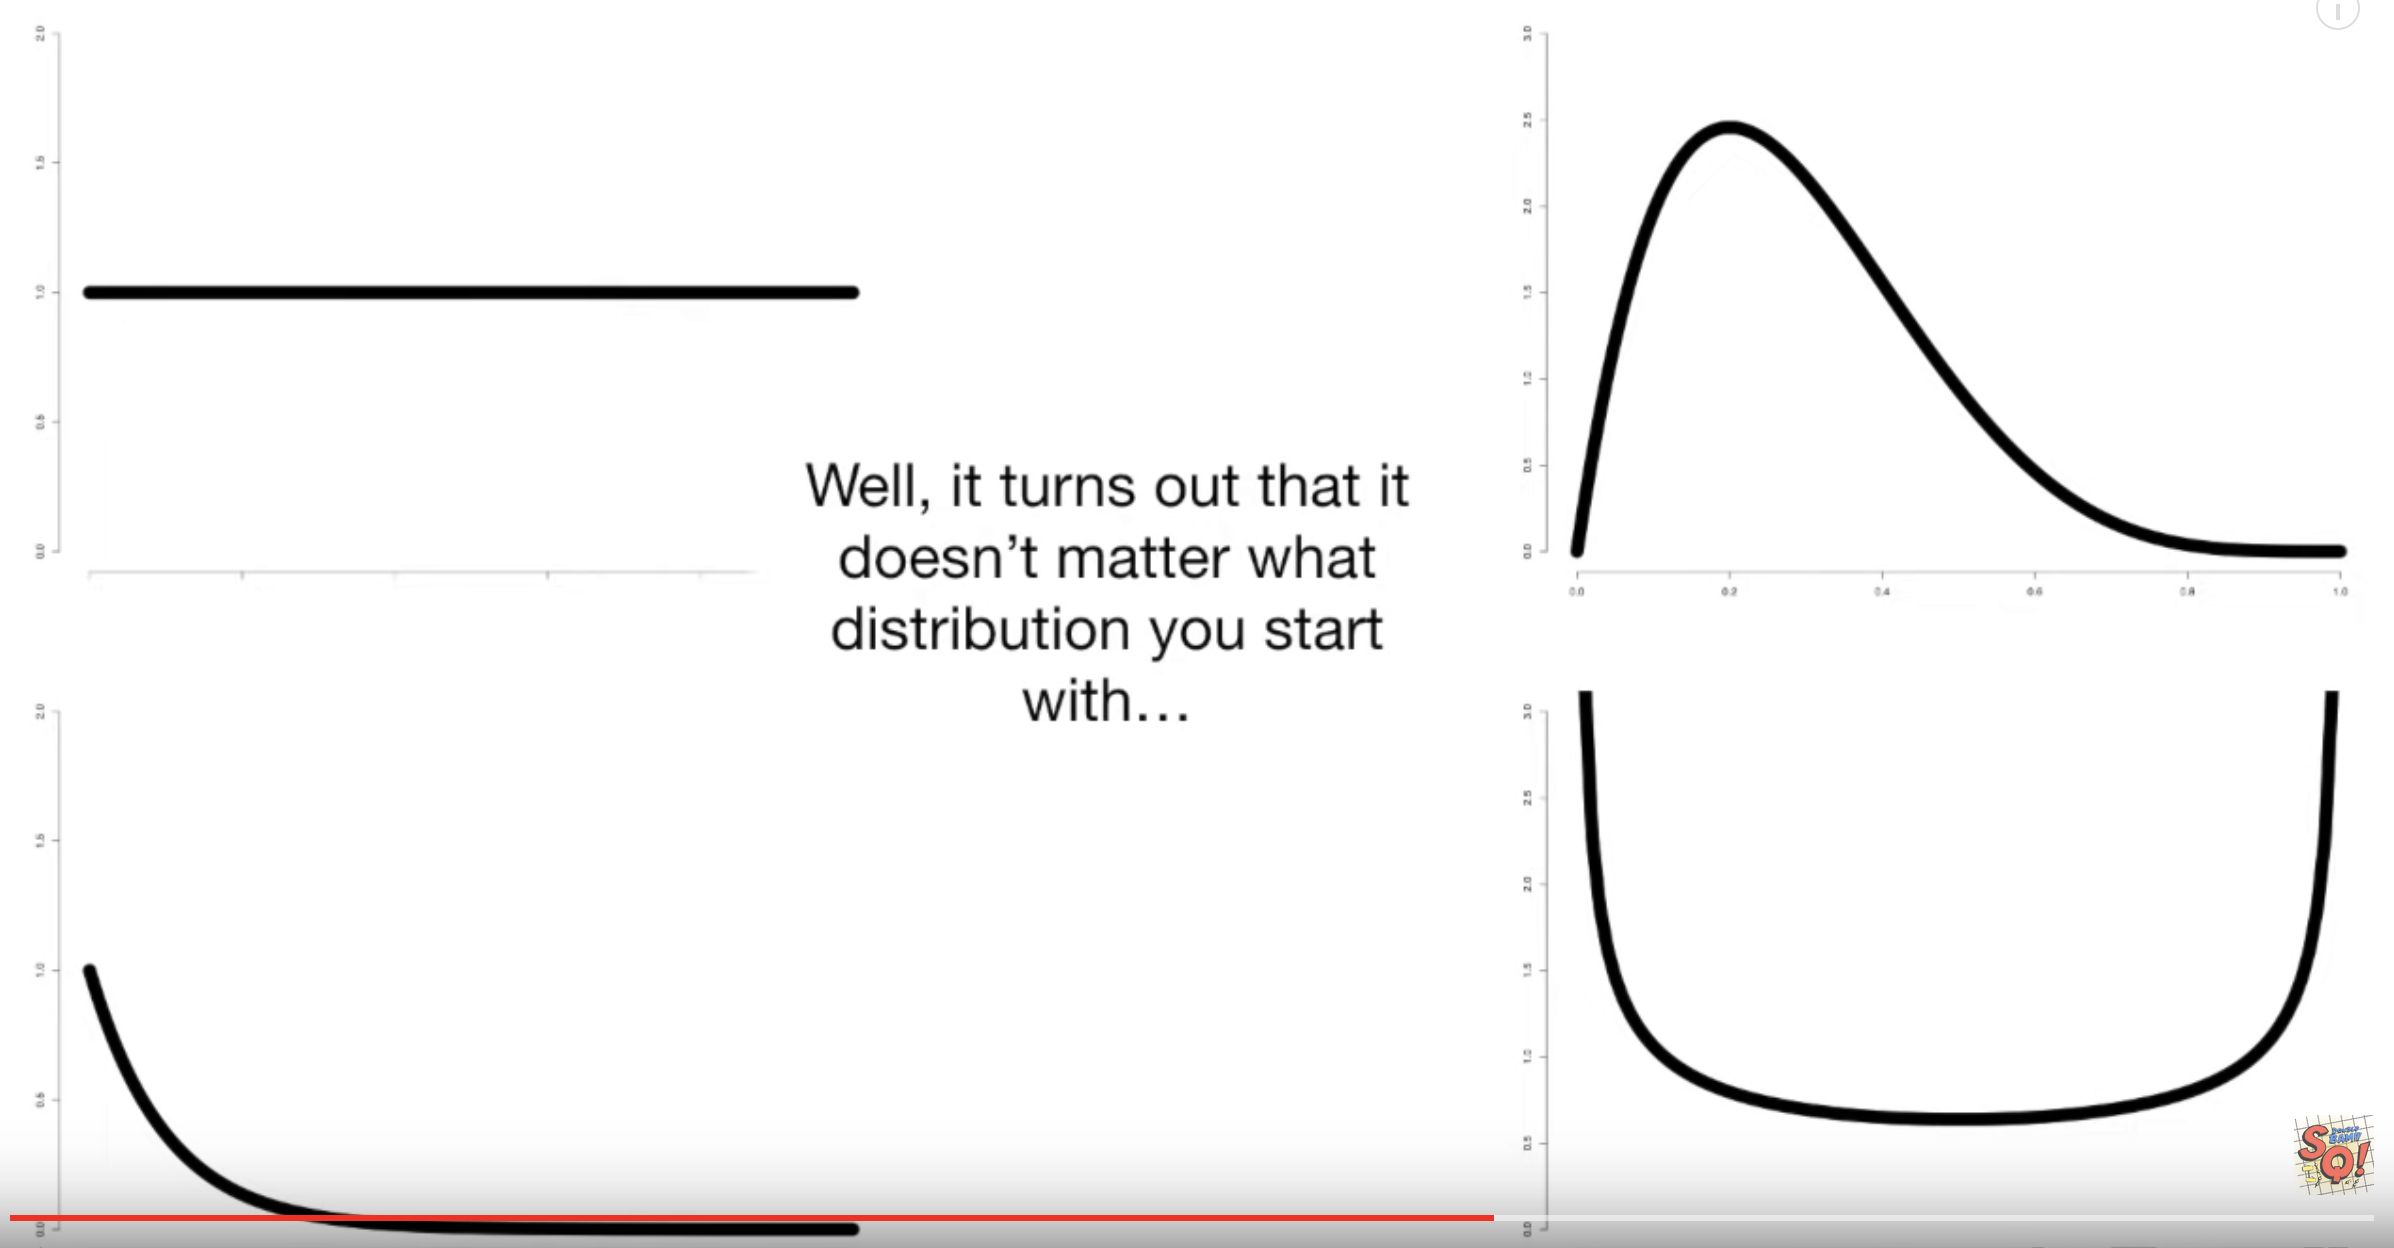
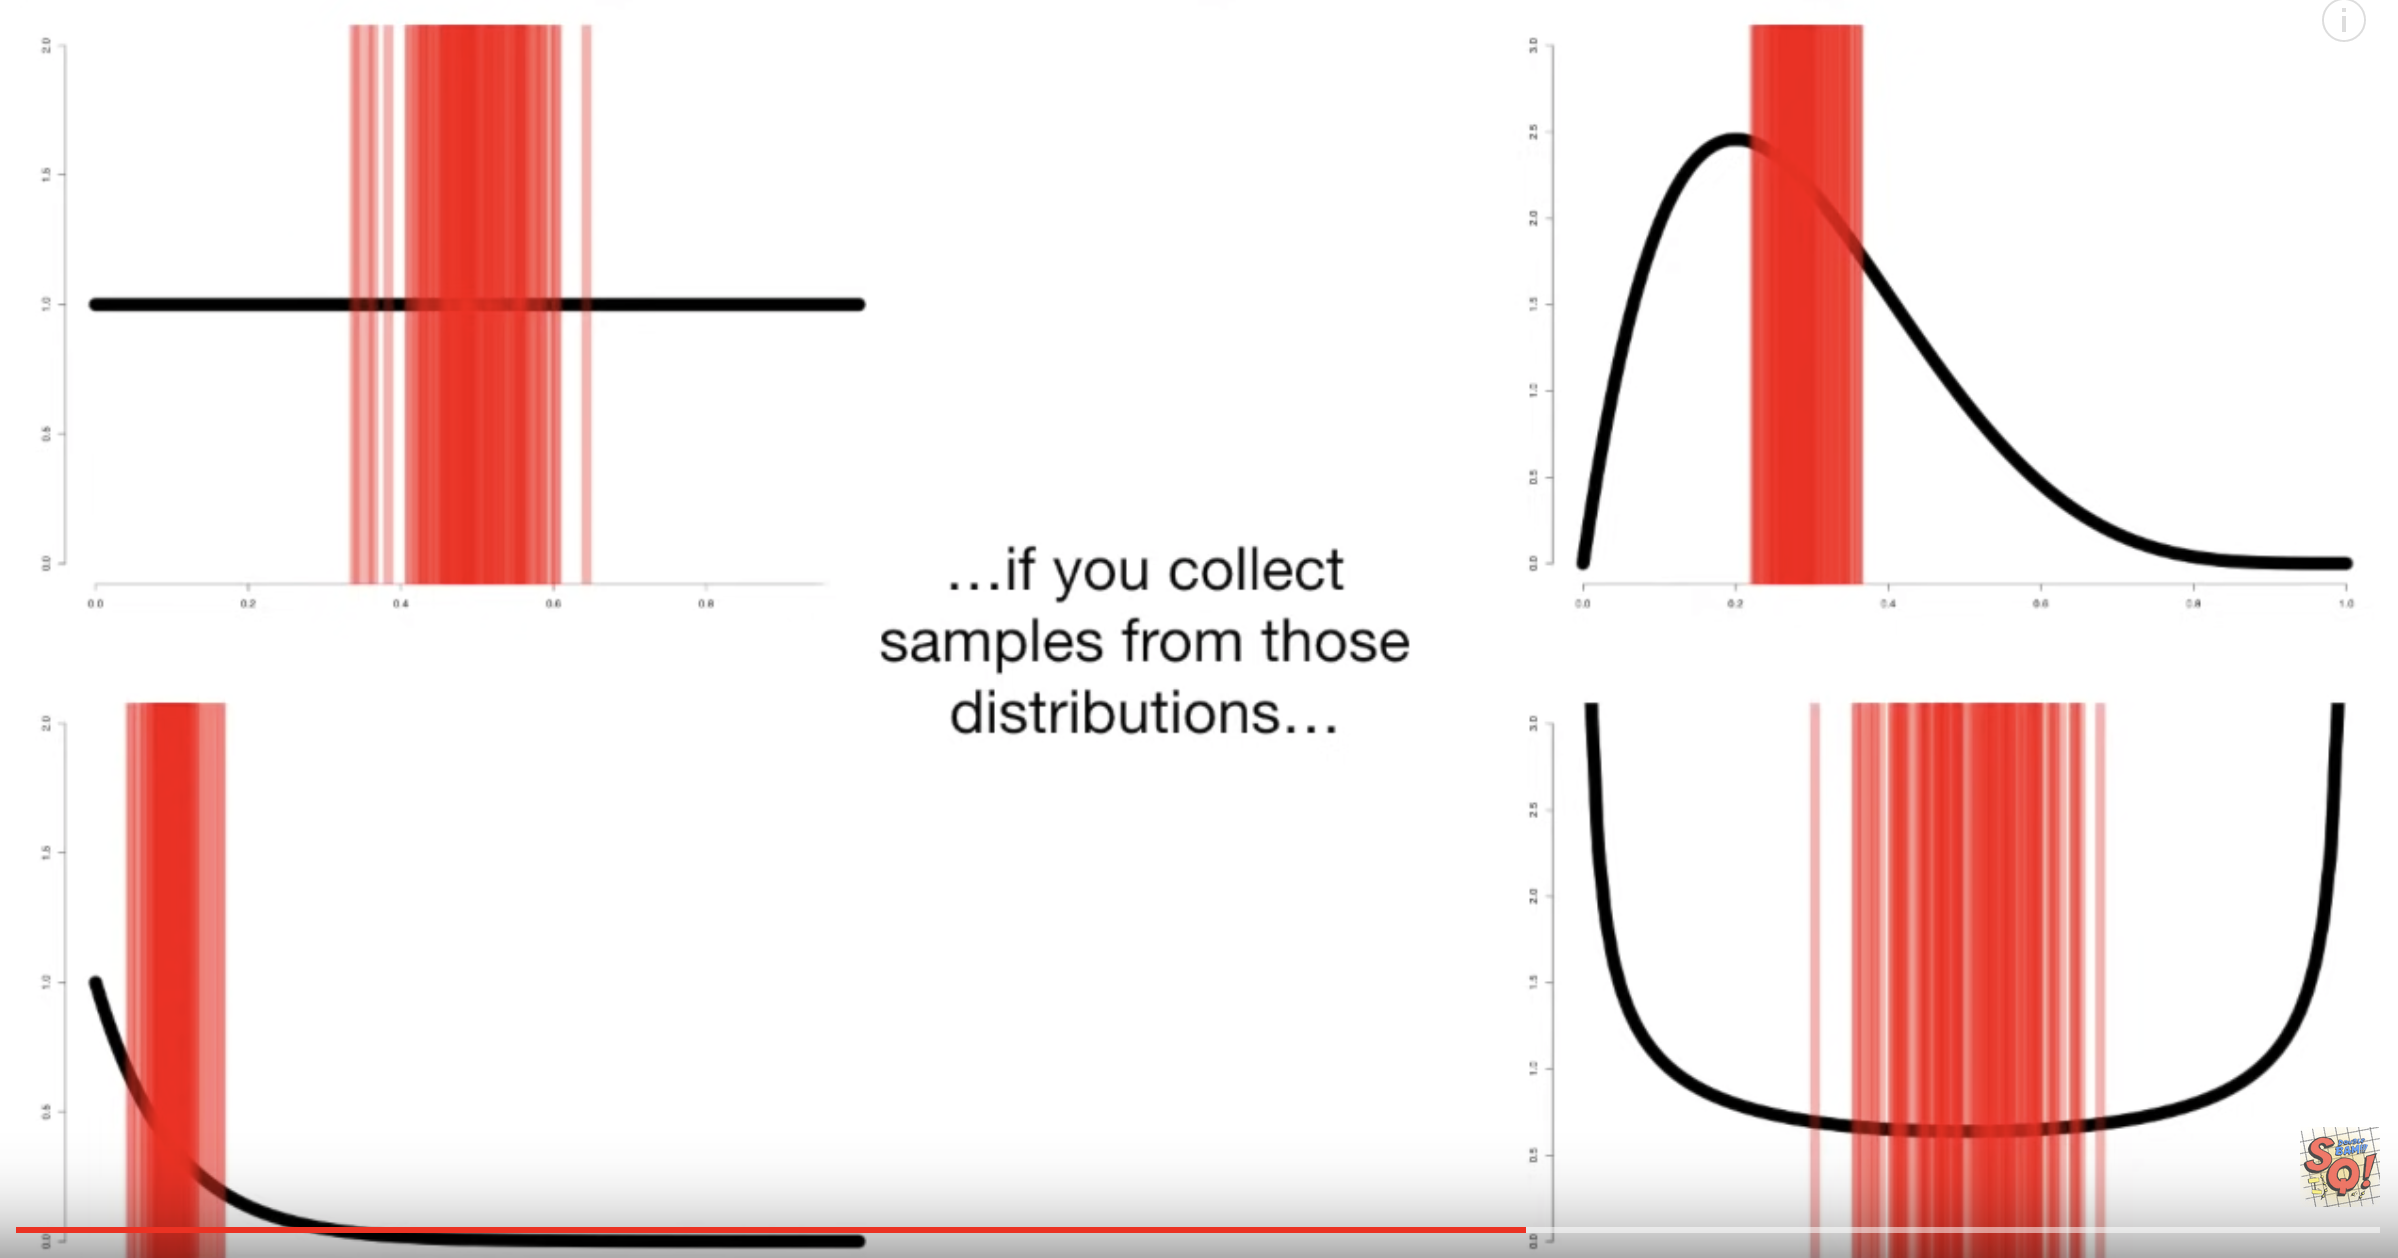
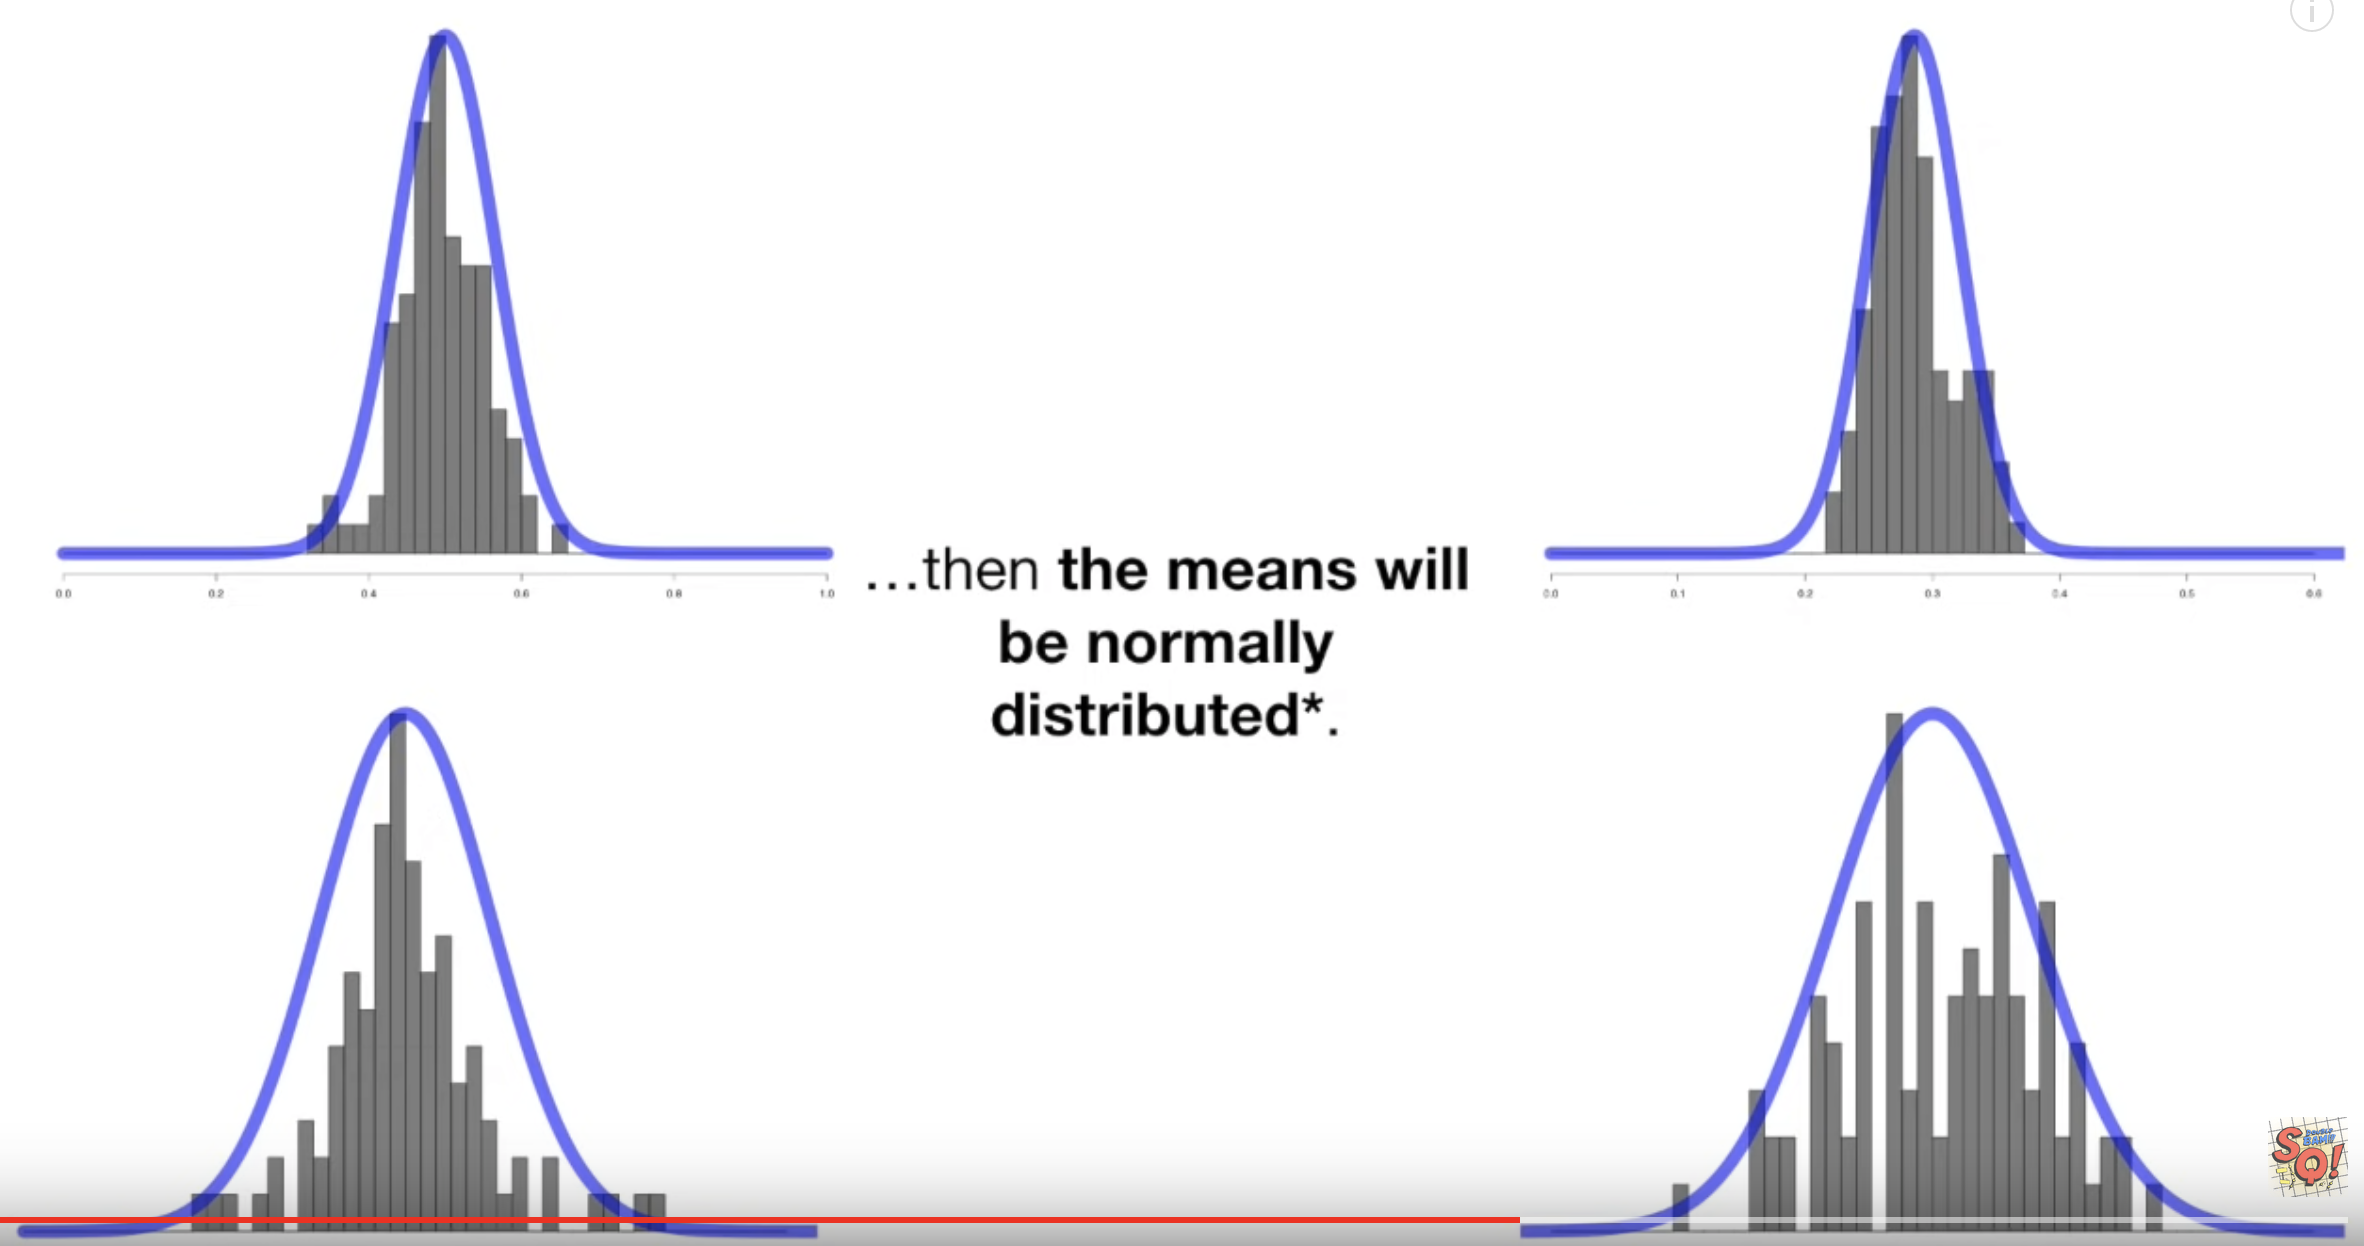

As a general rule of best practice, to hold the central limit theorem, the sample size for mean should be 30.

We can use mean's normal distribution to calculate;
1. Confidence Intervals
2. T-Test to identify if there is differene between mean of 2 samples
3. ANOVA-Test where we ask if there is a difference between the mean of 3 or more samples


### Probability is not a Likelihood!

Probability is usually referred to as likelihood but it's actually not.

Probability is a % chance that particular point will fall in a particular area in a Normal Distribution. It is the area under the curve.
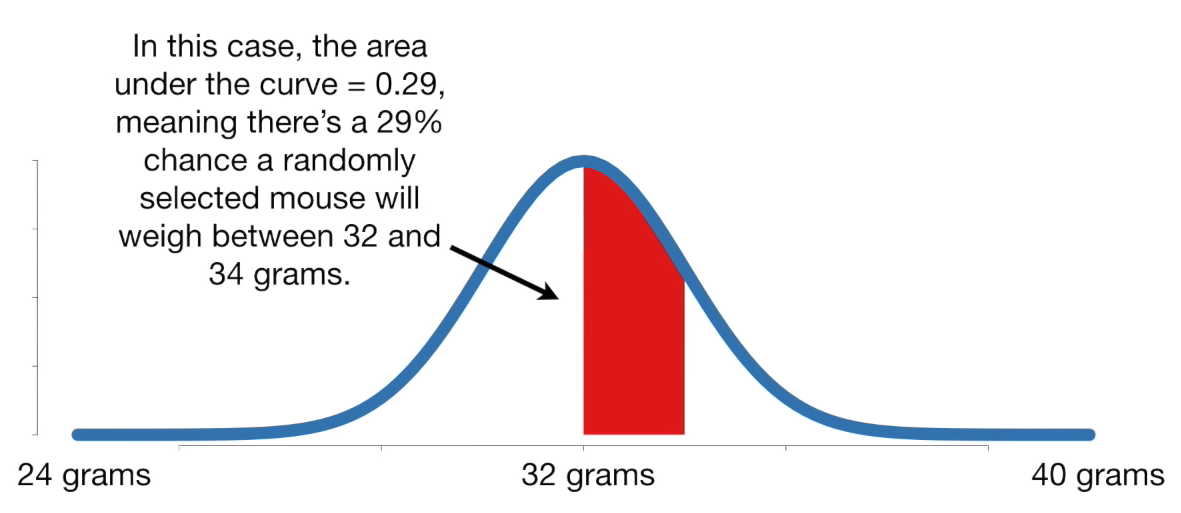
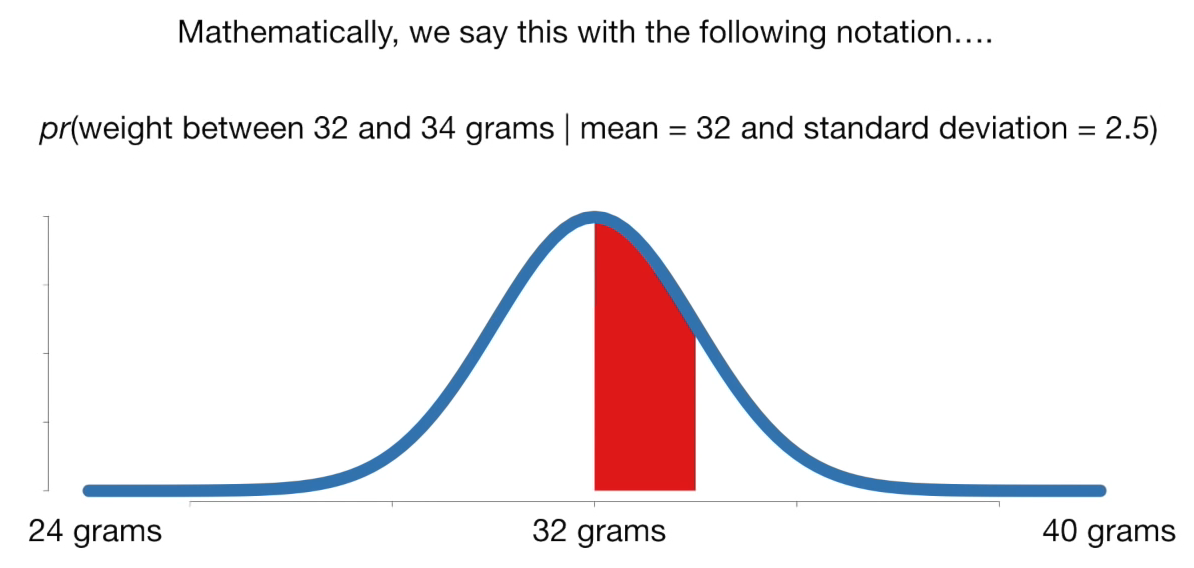

In the above,
    pr(mouse_weight >32 mouse_weight <=34) | mean=32 and std = 2.5
    the left side defines the area under the curve and the right side defines the shape and location of the
    distribution, stays the same.
    So when we talk about probabilities, we talk about the the right side that defines the distribution and the
    area under the curve that defines the probability.
    

    

Likelihood is the y-axis value that a particular point / mean of points will be equal to the mean / specific value on the x-axis distribution.

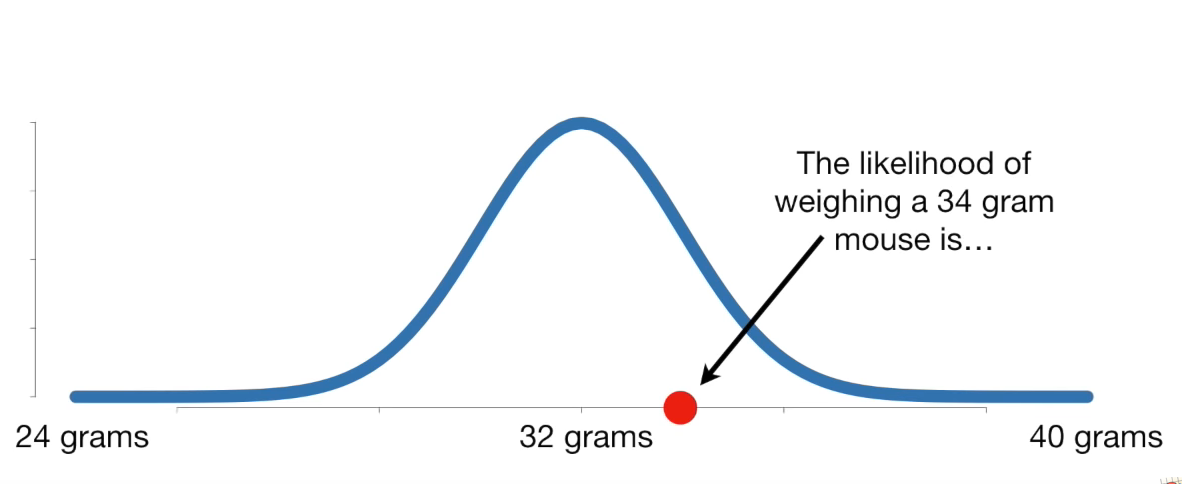
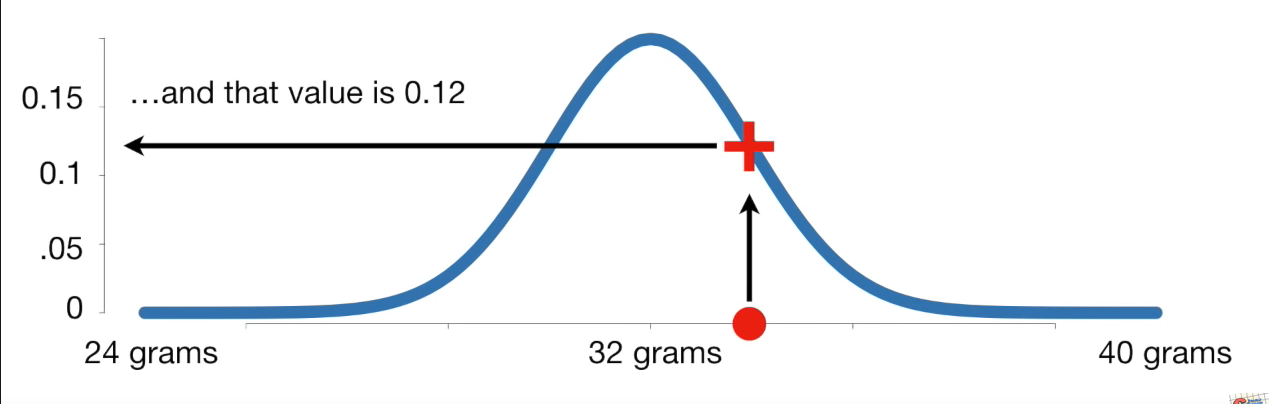
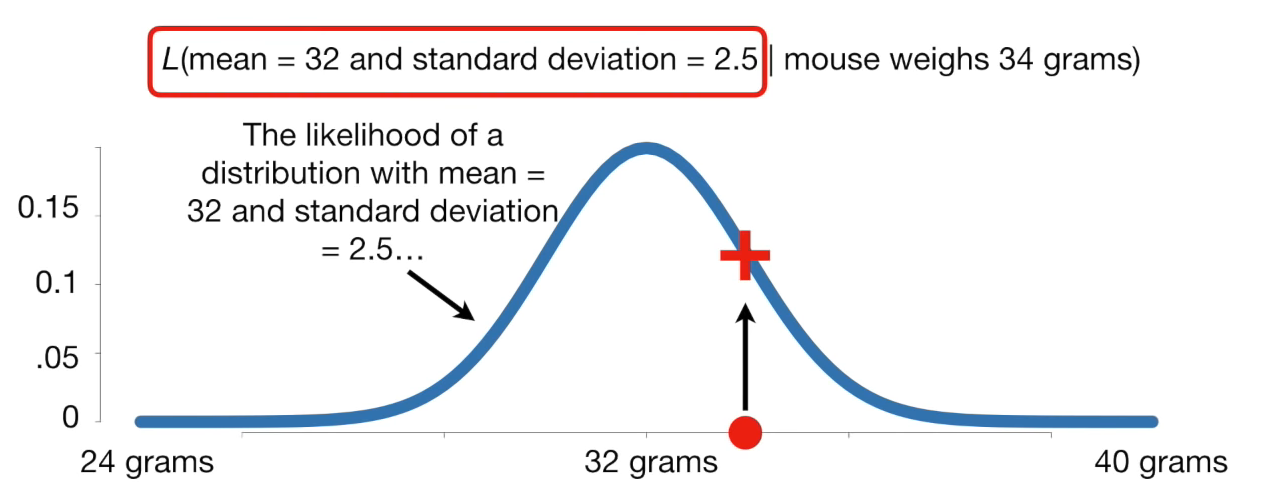
    L(mean = 32 and std = 2.5 | mouse_weight = 34) = 0.12
    The above says that the likelihood of mean = 32 and std  = 2.5 given we weight a 34 grm mouse is  
This concept applies to all continuos distributions.